In [ ]:
import pandas as pd
import re
import nltk
import spacy
pd.set_option('display.max_colwidth', 300)

In [ ]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
path ='/content/drive/My Drive/Omdena ISS/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iss = pd.read_csv(os.path.join(path,'Compiled_Cases.csv'), encoding = 'cp1252')

In [ ]:
iss.head()

,ID,Case
0,1,"On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother and perhaps other family members. The biological mother possibly moved to Canada, according to information the UNHCR received. However, we cannot be sure and as there is not a lot of information abou..."
1,2,The following information has been supplied by the Youth Welfare Office in Berlin The Social Worker who made the child welfare alert has been responsible for the family since 2014. The father of Lara and Fadi comes from Lebanon and was deported back to his country in 2017. He had been massively ...
2,3,"I hope you all are well and sane in these challenging times. I kindly ask you for your support in the case of Anas, d.o.b. 30.06.2004. Unfortunately I have only few information about the case: The mother, Nadia and Anaslive in Syria (contact: … mobile … ) . The father … lives still in Hamburg. T..."
3,4,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old Syrian child, currently living in Germany, in order to facilitate the re-establishment of contact between her and her father who is in Lebanon, to ensure a possible reunification and also provide a soc..."
4,5,"I am writing from Children and Families Across Borders, UK, to request your assistance on this case. It involves two children who are placed with foster carers in the UK. The foster carers travel to Lebanon frequently and would like to take the children with them for a holiday. As the children a..."


In [ ]:
stop_words = list(nlp.Defaults.stop_words)

In [ ]:
# lemmatization
def lemmatization(iss_str):
  tokens_list = []
  newString = ''
  for token in nlp(iss_str):
    tokens_list.append(token.lemma_)
  s = ' '.join(tokens_list)
  s = re.sub(r'-+[a-zA-Z]+-+', '', s)
  return s

In [ ]:
# stop words removal
def stop_word_removal(tokens):
  token_list = []
  #tokens = iss_str.split()
  for token in tokens:
    if token not in stop_words:
      token_list.append(token)
  s = ' '.join(token_list)
  newString = lemmatization(s)
  return newString

In [ ]:
def cleaner(iss_str):
    iss_str = re.sub(r'[()]', '', iss_str)
    iss_str = re.sub(r'[.,]', '', iss_str)
    iss_str = re.sub(r'\n', ' ', iss_str)
    iss_str = re.sub(r'st\b', '', iss_str)
    iss_str = re.sub(r'–', ' ', iss_str)
    iss_str = re.sub(r'…', '', iss_str)
    iss_str = re.sub(r'[“”]', '', iss_str)
    iss_str = re.sub(r'[\"]', '', iss_str)
    iss_str = re.sub(r'’s', '', iss_str)
    iss_str = re.sub(r'[;:?]', '', iss_str)
    iss_str = re.sub(r'[-]', ' ', iss_str)
    iss_str = iss_str.lower()
    tokens = iss_str.split()
    newString = stop_word_removal(tokens)
    return newString

In [ ]:
iss['Clean_Case'] = iss['Case'].apply(lambda s : cleaner(s))
iss.drop(['Case'], inplace = True, axis = 1)

In [ ]:
iss.head()

,ID,Clean_Case
0,1,behalf ms amira like ask cooperation trace biological mother family member biological mother possibly move canada accord information unhcr receive sure lot information mother like search biological mother lebanon ngo try find biological mother unfortunately succeed find contact unhcr assistance ...
1,2,follow information supply youth welfare office berlin social worker child welfare alert responsible family 2014 father lara fadi come lebanon deport country 2017 massively consume hero ine years mother addict 14 year old substitution programme year la year free substitute child attend kindergard...
2,3,hope sane challenging time kindly ask support case anas dob 30062004 unfortunately information case mother nadia anaslive syria contact mobile father live hamburg family live hamburg parent get divorce mother child leave syria 2009 father contact child 2010 family court hamburg decide custody li...
3,4,child protection office beirut lebanon request iss assistance 6 year old syrian child currently live germany order facilitate establishment contact father lebanon ensure possible reunification provide social report family situation mr ali mrs leila syrian national get marry 2010 6 month start wa...
4,5,write child family borders uk reque assistance case involve child place foster carer uk foster carer travel lebanon frequently like child holiday child foster care child service bromley parental responsibility ensure child safe time ask cooperation visit family friend accommodate child foster ca...


In [ ]:
# Bag of Words
all_words = []

for line in list(iss['Clean_Case']):
  words = line.split()
  for word in words:
    all_words.append(word)

In [ ]:
import matplotlib.pyplot as plt

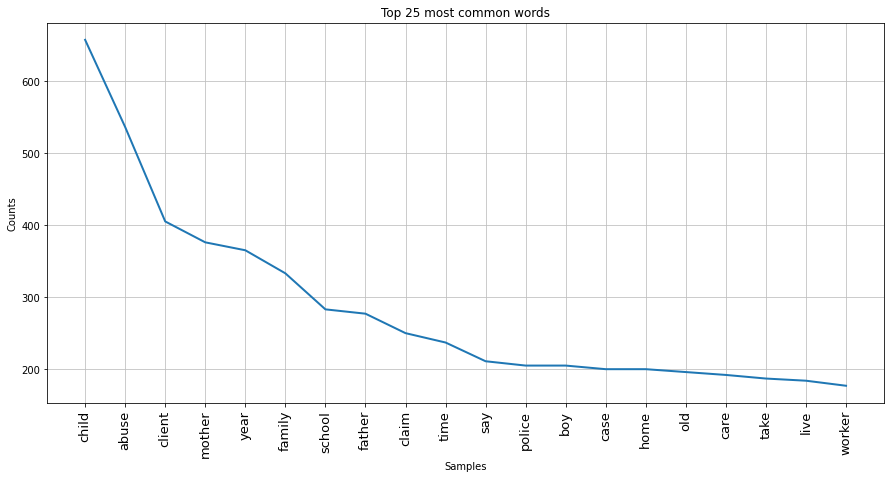

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(20,cumulative=False) 